In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler

dataset=pd.read_csv("train_set.tsv", sep='\t', header=0)
dataset_numpy=dataset.to_numpy()
x=dataset_numpy[:,:-2]
y=dataset_numpy[:,-2:]



In [29]:

# scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)





In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(750, 35) (750, 2) (250, 35) (250, 2)


In [44]:
def classificationResults(x_train,x_test,y_train,y_test,model):
    model.fit(x_train,y_train[:,0])
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print("Train F1 score: ",f1_score(y_train[:,0],y_pred_train,average='micro'))
    print("Train Precision score: ",precision_score(y_train[:,0],y_pred_train,average='micro'))
    print("Train Recall score: ",recall_score(y_train[:,0],y_pred_train,average='micro'))
    print("Test F1 score: ",f1_score(y_test[:,0],y_pred_test,average='micro'))
    print("Test Precision score: ",precision_score(y_test[:,0],y_pred_test,average='micro'))
    print("Test Recall score: ",recall_score(y_test[:,0],y_pred_test,average='micro'))
    print("\nConfusion Matrix test:")

    cm = confusion_matrix(y_test[:,0], y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()



Train F1 score:  1.0
Train Precision score:  1.0
Train Recall score:  1.0
Test F1 score:  0.408
Test Precision score:  0.408
Test Recall score:  0.408

Confusion Matrix test:


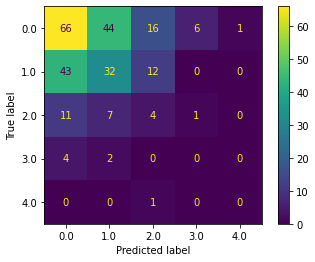

In [45]:

from sklearn import tree
model=tree.DecisionTreeClassifier()
classificationResults(x_train,x_test,y_train,y_test,model)

#there is a lot of overfitting because decision trees try to memorize the dataset so i try to use random forest to tackle this problem 

Train F1 score:  1.0
Train Precision score:  1.0
Train Recall score:  1.0
Test F1 score:  0.524
Test Precision score:  0.524
Test Recall score:  0.524

Confusion Matrix test:


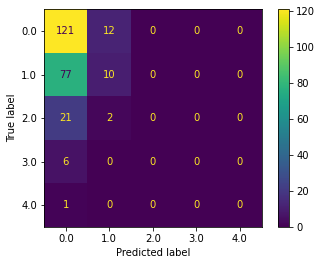

In [46]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classificationResults(x_train,x_test,y_train,y_test,model)


In [135]:
model=tree.DecisionTreeRegressor()
model.fit(x_train,y_train[:,0])

DecisionTreeRegressor()